In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from PIL import Image
import pytorch_lightning as pl
import albumentations as A
import pandas as pd
from albumentations.pytorch import ToTensorV2
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


from model_multiclass import *

train_transform = A.Compose(
    [
        A.Resize(256, 256),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

df = pd.read_csv('annotations_train_tcga.csv')
train_dataset = CustomDataset('./images/', df, transform=train_transform)
train_set, val_set = torch.utils.data.random_split(train_dataset, [0.7, 0.3])

train_loader = DataLoader(train_set, batch_size=8, num_workers=7, persistent_workers=True, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10, num_workers=7, persistent_workers=True, shuffle=False)

from lightning.pytorch.loggers import WandbLogger

wandb_logger = WandbLogger(project="QUILTCleaner")

model = CNN(num_classes=8)
trainer = pl.Trainer(accelerator='cuda', logger=wandb_logger, max_epochs=100, callbacks=[EarlyStopping(monitor="val_loss", patience=10, mode="min")])
trainer.fit(model, train_loader, val_loader)


/home/marc/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: maubreville. Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | model       | ResNet     | 23.5 M
1 | class_heads | ModuleList | 16.8 M
-------------------------------------------
40.3 M    Trainable params
0         Non-trainable params
40.3 M    Total params
161.283   Total estimated model params size (MB)


Epoch 0: 100%|████████████████████| 582/582 [00:10<00:00, 56.10it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  46%|███████▍        | 93/200 [00:00<00:01, 105.04it/s]


Validation DataLoader 0:  95%|██████████████▎| 190/200 [00:01<00:00, 104.38it/s]


Epoch 1: 100%|████████████████████| 582/582 [00:10<00:00, 57.34it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  42%|██████▋         | 83/200 [00:00<00:01, 109.40it/s]


Validation DataLoader 0:  90%|█████████████▌ | 180/200 [00:01<00:00, 108.41it/s]


Epoch 2: 100%|████████████████████| 582/582 [00:10<00:00, 57.28it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  36%|█████▊          | 73/200 [00:00<00:01, 100.00it/s]


Validation DataLoader 0:  85%|████████████▊  | 170/200 [00:01<00:00, 104.58it/s]


Epoch 3: 100%|████████████████████| 582/582 [00:10<00:00, 57.18it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  32%|█████▎           | 63/200 [00:00<00:01, 97.97it/s]


Validation DataLoader 0:  80%|████████████   | 160/200 [00:01<00:00, 104.47it/s]


Epoch 4: 100%|████████████████████| 582/582 [00:10<00:00, 56.95it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  26%|████▏           | 53/200 [00:00<00:01, 104.60it/s]


Validation DataLoader 0:  75%|███████████▎   | 150/200 [00:01<00:00, 104.86it/s]


Epoch 5: 100%|████████████████████| 582/582 [00:10<00:00, 57.30it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  22%|███▍            | 43/200 [00:00<00:01, 104.63it/s]


Validation DataLoader 0:  70%|██████████▌    | 140/200 [00:01<00:00, 107.92it/s]


Epoch 6: 100%|████████████████████| 582/582 [00:10<00:00, 57.01it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  16%|██▋             | 33/200 [00:00<00:01, 115.87it/s]


Validation DataLoader 0:  65%|█████████▊     | 130/200 [00:01<00:00, 101.10it/s]


Epoch 7: 100%|████████████████████| 582/582 [00:10<00:00, 57.31it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  12%|█▊              | 23/200 [00:00<00:01, 101.93it/s]


Validation DataLoader 0:  60%|█████████      | 120/200 [00:01<00:00, 106.01it/s]


Epoch 8: 100%|████████████████████| 582/582 [00:10<00:00, 57.44it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   6%|█               | 13/200 [00:00<00:01, 107.84it/s]


Validation DataLoader 0:  55%|████████▎      | 110/200 [00:01<00:00, 102.92it/s]


Epoch 9: 100%|████████████████████| 582/582 [00:10<00:00, 57.10it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   2%|▎                 | 3/200 [00:00<00:02, 94.76it/s]


Validation DataLoader 0:  50%|███████▌       | 100/200 [00:00<00:00, 105.65it/s]


Validation DataLoader 0:  98%|██████████████▊| 197/200 [00:01<00:00, 107.80it/s]


Epoch 10: 100%|███████████████████| 582/582 [00:10<00:00, 57.05it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  45%|███████▏        | 90/200 [00:00<00:01, 104.91it/s]


Validation DataLoader 0:  94%|██████████████ | 187/200 [00:01<00:00, 105.81it/s]


Epoch 11: 100%|███████████████████| 582/582 [00:10<00:00, 57.17it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  40%|██████▍         | 80/200 [00:00<00:01, 103.15it/s]


Validation DataLoader 0:  88%|█████████████▎ | 177/200 [00:01<00:00, 103.73it/s]


Epoch 12: 100%|███████████████████| 582/582 [00:10<00:00, 57.20it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  35%|█████▌          | 70/200 [00:00<00:01, 103.49it/s]


Validation DataLoader 0:  84%|████████████▌  | 167/200 [00:01<00:00, 105.98it/s]


Epoch 13: 100%|███████████████████| 582/582 [00:10<00:00, 57.28it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  30%|████▊           | 60/200 [00:00<00:01, 109.29it/s]


Validation DataLoader 0:  78%|███████████▊   | 157/200 [00:01<00:00, 107.29it/s]


Epoch 14: 100%|███████████████████| 582/582 [00:10<00:00, 57.34it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  25%|████            | 50/200 [00:00<00:01, 113.92it/s]


Validation DataLoader 0:  74%|███████████    | 147/200 [00:01<00:00, 106.87it/s]


Epoch 15: 100%|███████████████████| 582/582 [00:10<00:00, 57.01it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  20%|███▏            | 40/200 [00:00<00:01, 105.50it/s]


Validation DataLoader 0:  68%|██████████▎    | 137/200 [00:01<00:00, 106.66it/s]


Epoch 16: 100%|███████████████████| 582/582 [00:10<00:00, 57.04it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  15%|██▍             | 30/200 [00:00<00:01, 101.60it/s]


Validation DataLoader 0:  64%|█████████▌     | 127/200 [00:01<00:00, 105.81it/s]


Epoch 17: 100%|███████████████████| 582/582 [00:10<00:00, 57.10it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  10%|█▌              | 20/200 [00:00<00:01, 108.76it/s]


Validation DataLoader 0:  58%|████████▊      | 117/200 [00:01<00:00, 107.19it/s]


Epoch 18: 100%|███████████████████| 582/582 [00:10<00:00, 57.17it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   5%|▊               | 10/200 [00:00<00:01, 102.28it/s]


Validation DataLoader 0:  54%|████████       | 107/200 [00:01<00:00, 106.89it/s]


Epoch 19: 100%|███████████████████| 582/582 [00:10<00:00, 56.89it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|                          | 0/200 [00:00<?, ?it/s]


Validation DataLoader 0:  48%|███████▊        | 97/200 [00:00<00:00, 108.03it/s]


Validation DataLoader 0:  97%|██████████████▌| 194/200 [00:01<00:00, 107.36it/s]


Epoch 20: 100%|███████████████████| 582/582 [00:10<00:00, 56.95it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  44%|██████▉         | 87/200 [00:00<00:01, 110.93it/s]


Validation DataLoader 0:  92%|█████████████▊ | 184/200 [00:01<00:00, 109.18it/s]


Epoch 21: 100%|███████████████████| 582/582 [00:10<00:00, 57.02it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  38%|██████▏         | 77/200 [00:00<00:01, 110.20it/s]


Validation DataLoader 0:  87%|█████████████  | 174/200 [00:01<00:00, 108.07it/s]


Epoch 22: 100%|███████████████████| 582/582 [00:10<00:00, 57.33it/s, v_num=xalr]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  34%|█████▎          | 67/200 [00:00<00:01, 106.20it/s]


Validation DataLoader 0:  82%|████████████▎  | 164/200 [00:01<00:00, 107.91it/s]


Epoch 22: 100%|███████████████████| 582/582 [00:12<00:00, 46.60it/s, v_num=xalr]


# Validation

In [2]:
from torchmetrics import Recall
from tqdm import tqdm 

recall = Recall(task="multilabel", average="none", num_labels=8)
with torch.no_grad():
    for data in tqdm(val_loader):
        y_pred = model(data[0])
        recall.update(y_pred, data[1])
recall.compute()


100%|█████████████████████████████████████████| 200/200 [00:40<00:00,  4.90it/s]


tensor([0.8333, 0.9292, 0.6938, 0.4818, 0.4500, 0.7681, 0.8543, 0.6552])

# Test 

In [3]:
df_test = pd.read_csv('annotations_test.csv')

test_transform = A.Compose(
    [
        A.Resize(256, 256),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

test_dataset = CustomDataset('./images/', df_test, transform=test_transform)

test_loader = DataLoader(test_dataset, batch_size=10, num_workers=7, persistent_workers=True, shuffle=False)


In [4]:


recall = Recall(task="multilabel", average="none", num_labels=8)
with torch.no_grad():
    for data in tqdm(test_loader):
        y_pred = model(data[0])
        recall.update(y_pred, data[1])
recall.compute()

100%|█████████████████████████████████████████| 196/196 [00:39<00:00,  4.91it/s]


tensor([0.9265, 0.9659, 0.8266, 0.4779, 0.4508, 0.9275, 0.9228, 0.7086])

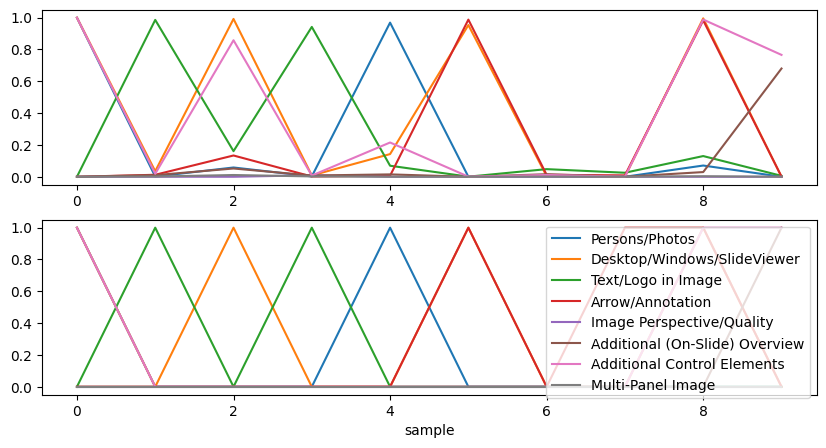

In [5]:
import matplotlib.pyplot as plt
classes = ['Persons/Photos', 'Desktop/Windows/SlideViewer','Text/Logo in Image','Arrow/Annotation','Image Perspective/Quality', 'Additional (On-Slide) Overview', 'Additional Control Elements', 'Multi-Panel Image']

fig,ax = plt.subplots(2,1,figsize=(10,5))
ax[0].plot(y_pred)
ax[1].plot(data[1])
plt.xlabel('sample')
plt.legend(classes)

# Inference on remainder of dataset

In [6]:
all_quilt = os.listdir('/data/patho/text2image/QUILT_1M/quilt_1m')
df_all = [x.split('/')[-1] for x in pd.read_csv('annotations.csv').Image.to_numpy()]

not_used = [x for x in all_quilt if x not in df_all]


In [7]:
df_unused = pd.DataFrame({'Image': not_used})

In [8]:

df_unused['Class 1']=0
df_unused['Class 2']=0
df_unused['Class 3']=0
df_unused['Class 4']=0
df_unused['Class 6']=0
df_unused['Class 7']=0
df_unused['Class 8']=0
df_unused['Class 9']=0

In [9]:
unused_dataset = CustomDataset('/data/patho/text2image/QUILT_1M/quilt_1m/', df_unused, transform=test_transform)

unused_loader = DataLoader(unused_dataset, batch_size=10, num_workers=7, persistent_workers=True, shuffle=False)


In [12]:
results=[]
with torch.no_grad():
    model = model.cuda()
    for data in tqdm(unused_loader):
        y_pred = model(data[0].cuda())
        results += y_pred.data

100%|█████████████████████████████████████| 64669/64669 [10:47<00:00, 99.90it/s]


In [13]:
torch.save(results, 'prediction_tcgaaugmented_quilt_1m.pth')

In [14]:
res = torch.vstack(results)

In [15]:
torch.save(res, 'prediction_tcgaaugmented_quilt_1m.pth')

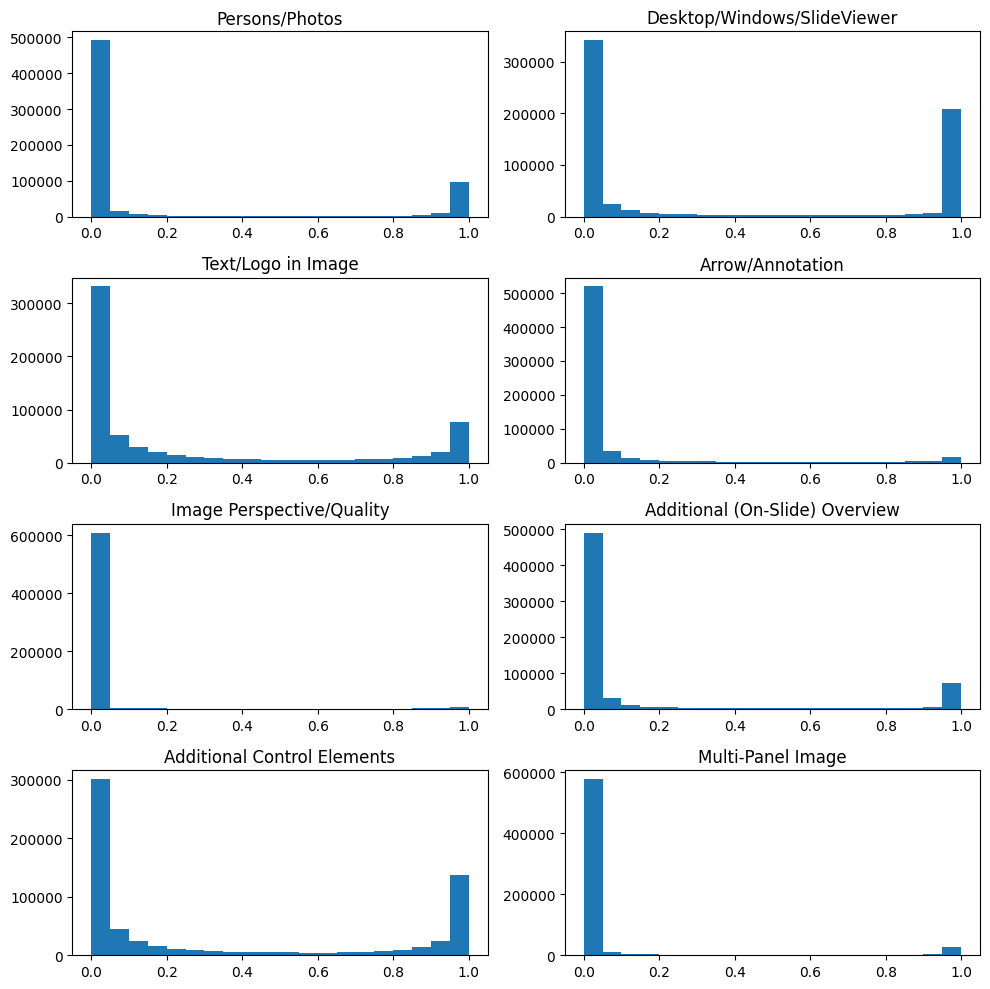

In [17]:
fig,ax=plt.subplots(4,2,figsize=(10,10))
ax=ax.flatten()
for i,c in enumerate(classes):
    ax[i].hist(res[:,i].cpu(),bins=20)
    ax[i].set_title(c)
plt.tight_layout()

Text(0.5, 1.0, 'any impurity')

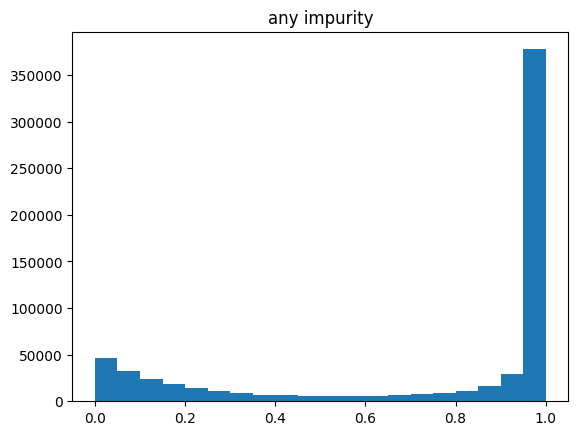

In [18]:
anyimp = torch.max(res.cpu(),1).values
plt.hist(anyimp,20)
plt.title('any impurity')

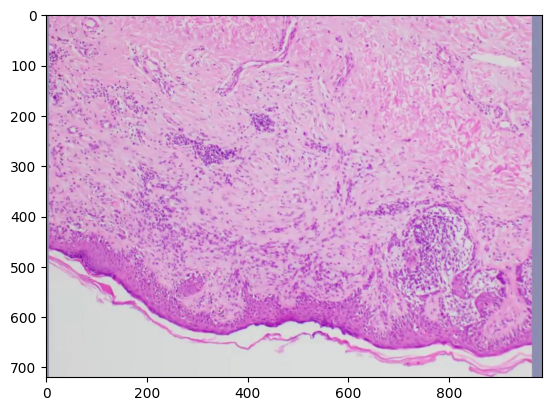

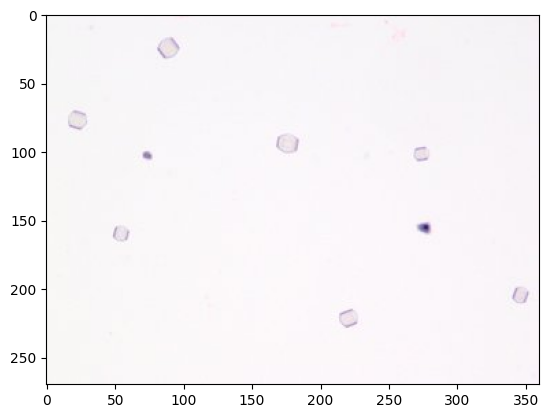

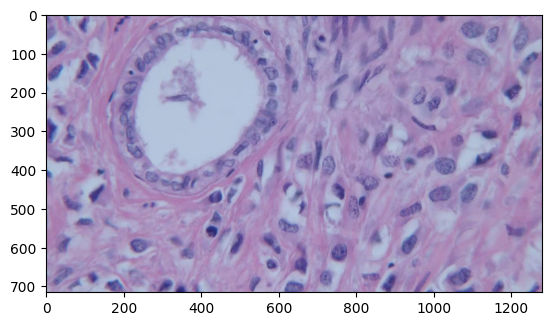

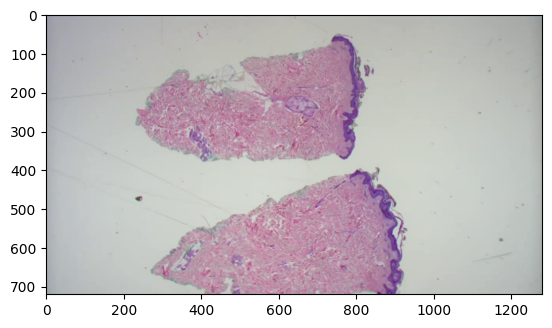

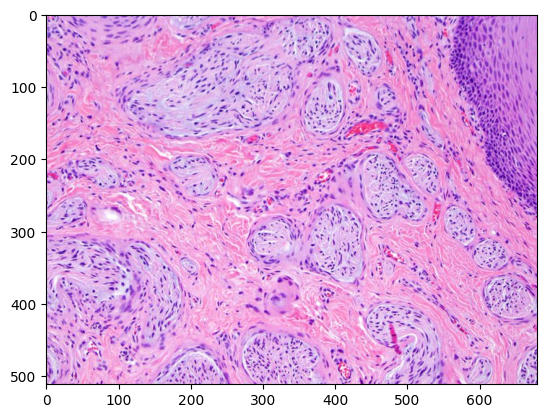

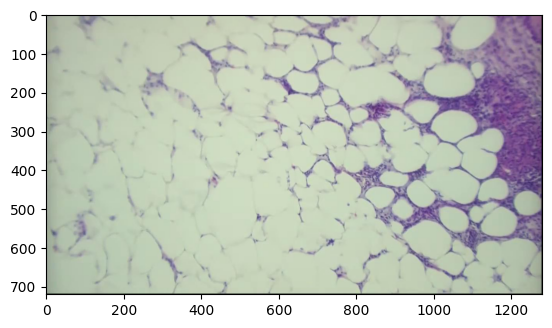

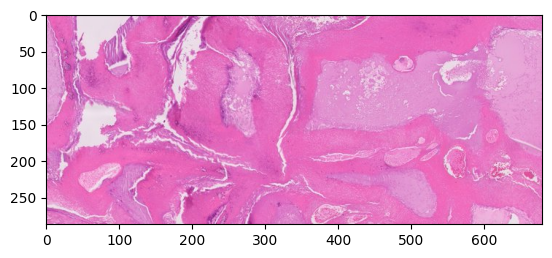

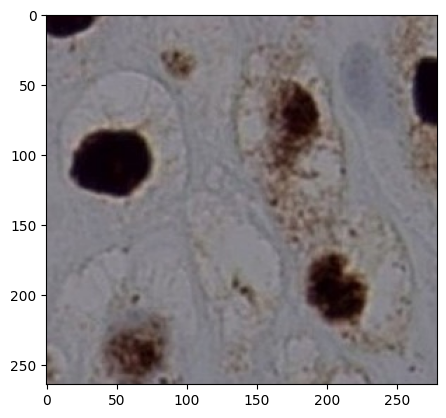

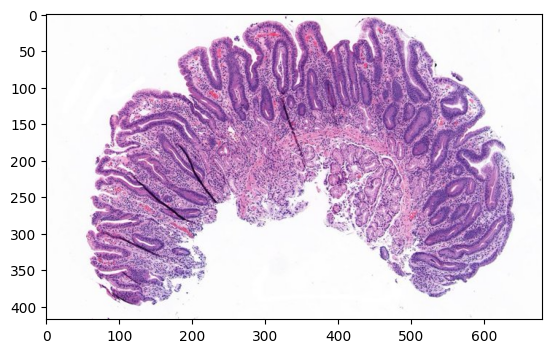

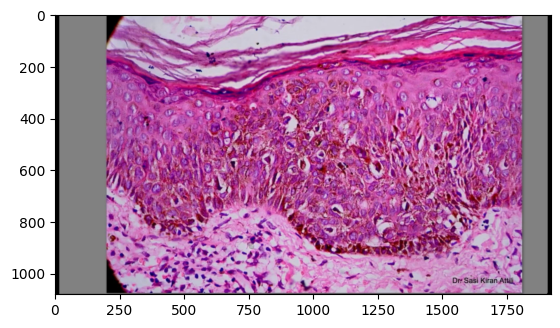

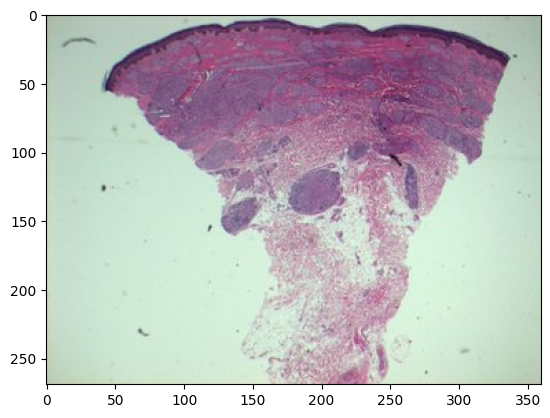

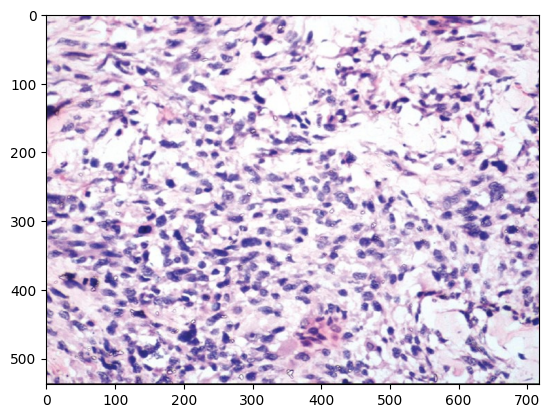

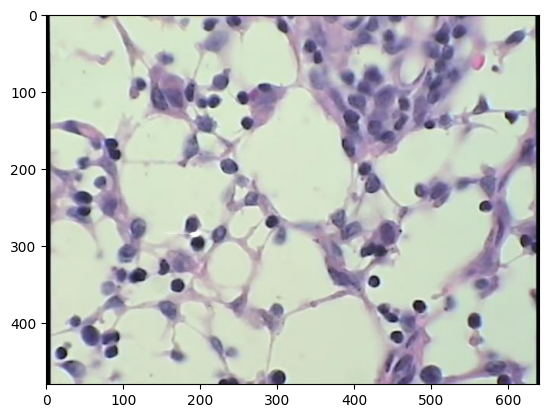

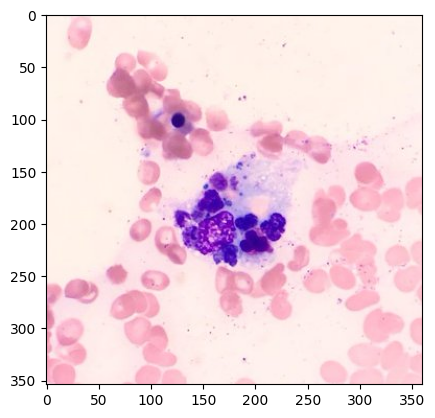

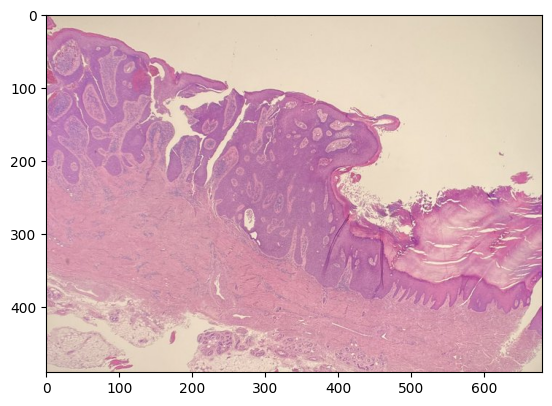

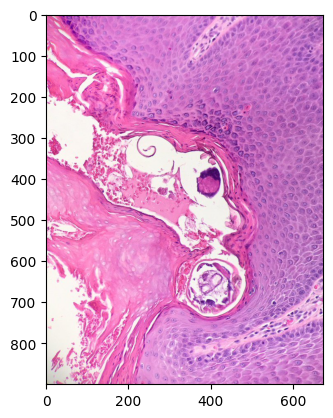

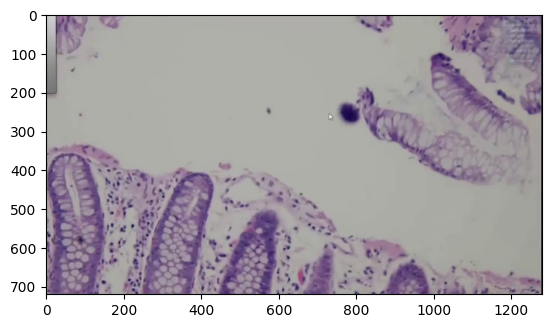

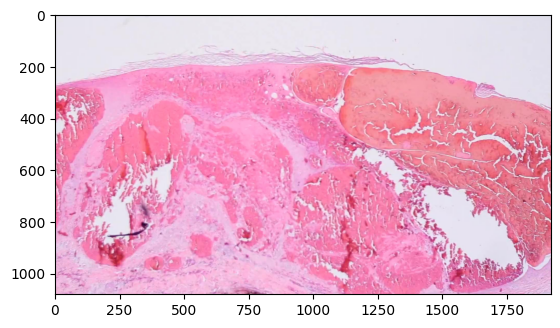

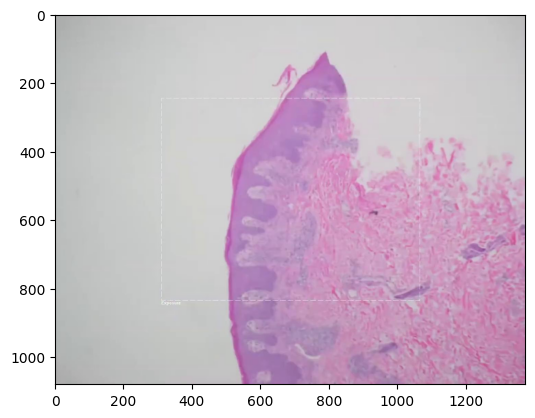

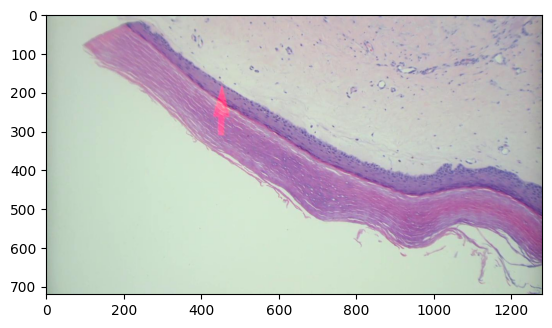

In [20]:
from PIL import Image
sel = anyimp<0.05
for k in np.array(not_used)[sel][0:20]:
    i = Image.open('/data/patho/text2image/QUILT_1M/quilt_1m/'+k)
    plt.figure()
    plt.imshow(i)